# Data collection through Webscraping

Rafiq Islam  
2024-08-14

## Introduction

Collecting data and preparing it for a project is one of the most
important tasks in any data science or machine learning project. There
are many sources from where we can collect data for a project, such as

-   Connecting to a SQL database server  
-   Data Source Websites such as
    <a href="https://www.kaggle.com" target="_blank">Kaggle</a>,
    <a href="https://datasetsearch.research.google.com"
    target="_blank">Google Dataset Search</a>,
    <a href="https://archive.ics.uci.edu/datasets" target="_blank">UCI
    Machine Learning Repo</a> etc  
-   Web Scraping with Beautiful Soup
-   Using Python API

## Data Source Websites

Data source websites mainly falls into two categories such as data
repositories and data science competitions. There are many such
websites.

1.  The
    <a href="https://archive.ics.uci.edu/datasets" target="_blank">UCI
    Machine Learning Repository</a>  
2.  The <a href="https://dataverse.harvard.edu" target="_blank">Harvard
    Dataverse</a>
3.  The
    <a href="https://data.mendeley.com" target="_blank">Mendeley Data
    Repository</a>
4.  The <a href="https://github.com/fivethirtyeight/data"
    target="_blank">538</a>
5.  The
    <a href="https://github.com/nytimes" target="_blank">New Yourk Times</a>  
6.  The <a
    href="https://www.competitionsciences.org/competitions/international-data-analysis-olympiad/"
    target="_blank">International Data Analysis Olympiad</a>
7.  <a href="https://www.kaggle.com" target="_blank">Kaggle Competition</a>

Example of collecting data from
<a href="https://archive.ics.uci.edu/datasets" target="_blank">UCI
Machine Learning Repository</a>

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

you may need to install the
<a href="https://archive.ics.uci.edu/datasets" target="_blank">UCI
Machine Learning Repository</a> as a package using pip.

    pip install ucimlrepo

In [2]:
X.head()

## Web Scraping

We scrapping is another way of collecting the data for the research if
the data is not available in any repositiory. We can collect the data
from a website using a library called `BeautifulSoup` if the website has
permision for other people to collect data from the website.

In [3]:
import bs4                      # library for BeautifulSoup
from bs4 import BeautifulSoup   # import the BeautifulSoup object
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")

Now let’s make a html object using `BeautifulSoup`. Let’s say we have a
html website that looks like below

In [4]:
html_doc="""
<!DOCTYPE html>
<html lang="en">
<head>
    <title>My Dummy HTML Document</title>
</head>
<body>
    <h1>Welcome to My Dummy HTML Document</h1>
    <p>This is a paragraph in my dummy HTML document.</p>
    <a href="https://mrislambd.github.io/blog" class="blog" id="blog"> Blog </a>
    <a href="htpps://mrislambd.github.io/research" class="research" id="research"> Research </a>
</body>
</html>
"""

Now we want to grab information from the dummy html documnet above.

In [5]:
soup=BeautifulSoup(html_doc, features='html.parser')

Now that we have the object `soup` we can walk through each elements in
this object. For example, if we want to grab the title element,

In [6]:
soup.html.head.title

<title>My Dummy HTML Document</title>

Since the html document has only one title, therefore, we can simply use
the following command

In [7]:
soup.title 

<title>My Dummy HTML Document</title>

or this command to get the text only

In [8]:
soup.title.text

'My Dummy HTML Document'

This `soup` object is like a family tree. It has parents, children,
greatgrand parents etc.

In [9]:
soup.title.parent

<head>
<title>My Dummy HTML Document</title>
</head>

Now to grab an attribute from the `soup` object we can use

In [10]:
soup.a

<a class="blog" href="https://mrislambd.github.io/blog" id="blog"> Blog </a>

or any particular thing from the attribute

In [11]:
soup.a['class']

['blog']

We can also find multiple attribute of the same kind

In [12]:
soup.findAll('a')

[<a class="blog" href="https://mrislambd.github.io/blog" id="blog"> Blog </a>,
 <a class="research" href="htpps://mrislambd.github.io/research" id="research"> Research </a>]

Then if we want any particular object from all `a` attribute

In [13]:
soup.findAll('a')[0]['id']

'blog'

For any `p` tag

In [14]:
soup.p.text 

'This is a paragraph in my dummy HTML document.'

Similarly, if we want to grab all the `href`s from the `a` tags

In [15]:
[h['href'] for h in soup.findAll('a')]

['https://mrislambd.github.io/blog', 'htpps://mrislambd.github.io/research']

## Example of Webscraping from a real website

In this example we want to obtain some information from
<a href="https://research.nvidia.com/graduate-fellowships/archive"
target="_blank">NVIDIA Graduate Fellowship Program</a>. Before accessing
this website we need to know if we have permision to access their data
through webscraping.

In [16]:
import requests
response = requests.get(url="https://research.nvidia.com/graduate-fellowships/archive")
response.status_code

200

The `status_code` $200$ ensures that we have enough permision to acccess
their website data. However, if we obtain `status_code` of $403, 400,$
or $500$ then we do not permision or a `bad request`. For more about the
status codes
<a href="https://developer.mozilla.org/en-US/docs/Web/HTTP/Status"
target="_blank">click here</a>.

In [17]:
soup = BeautifulSoup(response.text, 'html.parser')

We want to make an analysis based on the institution of the past
graduate fellows. Insepecting the elements in
<a href="https://developer.mozilla.org/en-US/docs/Web/HTTP/Status"
target="_blank">this website</a> we see that the `div` those have
`class="archive-group"` contains the information of the past graduate
fellows.

In [18]:
pf = soup.find_all("div", class_="archive-group")

and the first element of this `pf` contains the information of the
graduate fellows in the year of 2021.

In [19]:
pf[0]

<div class="archive-group">
<h4 class="archive-group__title">2021 Grad Fellows</h4>
<div class="views-row"><div class="views-field views-field-title"><span class="field-content">Alexander Sax</span></div><div class="views-field views-field-field-grad-fellow-institution"><div class="field-content">University of California, Berkeley</div></div></div>
<div class="views-row"><div class="views-field views-field-title"><span class="field-content">Hanrui Wang</span></div><div class="views-field views-field-field-grad-fellow-institution"><div class="field-content">Massachusetts Institute of Technology</div></div></div>
<div class="views-row"><div class="views-field views-field-title"><span class="field-content">Ji Lin</span></div><div class="views-field views-field-field-grad-fellow-institution"><div class="field-content">Massachusetts Institute of Technology</div></div></div>
<div class="views-row"><div class="views-field views-field-title"><span class="field-content">Krishna Murthy Jatavalla

Now let’s make a `pandas` dataframe using the information in this page.
We can make an use of the output from the above chunk. To grab the year,
we see that `archive-group__title` class with a `h4` tag contains the
year for all years. With `strip=True`, the text is cleaned by removing
extra whitespace from the beginning and end. We need the first element
so a `split()[0]` will do the job. Then we make another group called
`fellows` that contains the fellows in a certian year by using the `div`
and `class"views-row"`. Once the new group created, we then iterate
through this group to extract their names and corresponding
institutions.

In [20]:
data=[]

for group in pf:
    year = group.find(
        "h4",class_="archive-group__title"
        ).get_text(strip=True).split()[0]

    fellows = group.find_all("div", class_="views-row")
    for fellow in fellows:
        name = fellow.find(
            "div", class_="views-field-title"
            ).get_text(strip=True) 
        institute = fellow.find(
            "div", class_="views-field-field-grad-fellow-institution"
            ).get_text(strip=True)

        data.append({"Name": name, "Year": year, "Institute": institute})

data=pd.DataFrame(data)
data.head()

Now let’s perform some Exploratory Data Analysis (EDA). First, we
analyze the unique values and distributions.

In [21]:
# Count the number of fellows each year
year_counts = data['Year'].value_counts().sort_values(ascending=False)
# Create a DataFrame where years are columns and counts are values in the next row
year_data = {
    'Year': year_counts.index,
    'Count': year_counts.values
}
# Create the DataFrame
year_data_counts = pd.DataFrame(year_data)

# Transpose the DataFrame and reset index to get years as columns
year_data_counts = year_data_counts.set_index('Year').T

# Display the DataFrame
print(year_data_counts)

Year   2006  2018  2017  2007  2013  2012  2011  2008  2019  2021  2003  2009  \
Count    12    11    11    11    11    11    11    10    10    10    10    10   

Year   2010  2005  2015  2004  2016  2002  2020  2014  
Count     9     8     7     7     6     6     5     5  

Next we see that most represented universities

In [22]:
university_counts = data['Institute'].value_counts()
print(university_counts.head(10))  # Display the top 10 universities

Institute
Stanford University                          24
Massachusetts Institute of Technology        15
University of California, Berkeley           14
Carnegie Mellon University                   13
University of Utah                           10
University of Washington                      9
University of Illinois, Urbana-Champaign      9
University of California, Davis               8
Georgia Institute of Technology               8
University of North Carolina, Chapel Hill     6
Name: count, dtype: int64

To visualize the award distributions per year,

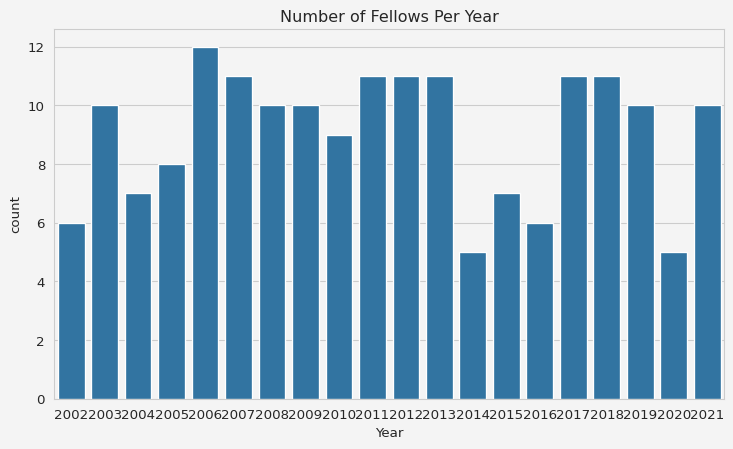

In [23]:
plt.figure(figsize=(9,5))
sns.countplot(x='Year', data=data, order=sorted(data['Year'].unique()))
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.title('Number of Fellows Per Year')
plt.show()

Top 10 universities visualization

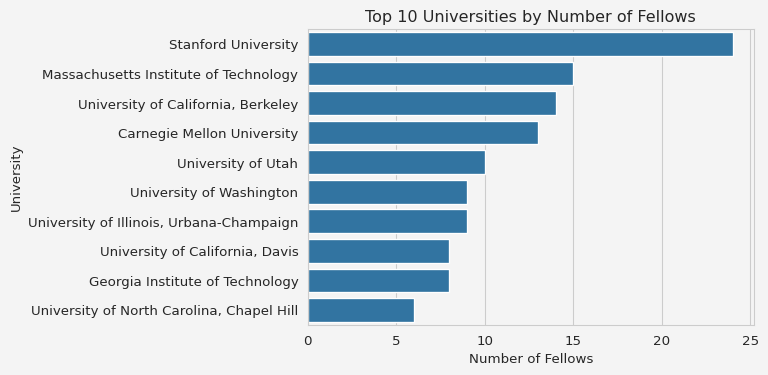

In [24]:
plt.figure(figsize=(6,4))
top_universities = data['Institute'].value_counts().head(10)
sns.barplot(y=top_universities.index, x=top_universities.values)
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.title('Top 10 Universities by Number of Fellows')
plt.xlabel('Number of Fellows')
plt.ylabel('University')
plt.show()

Trend over time

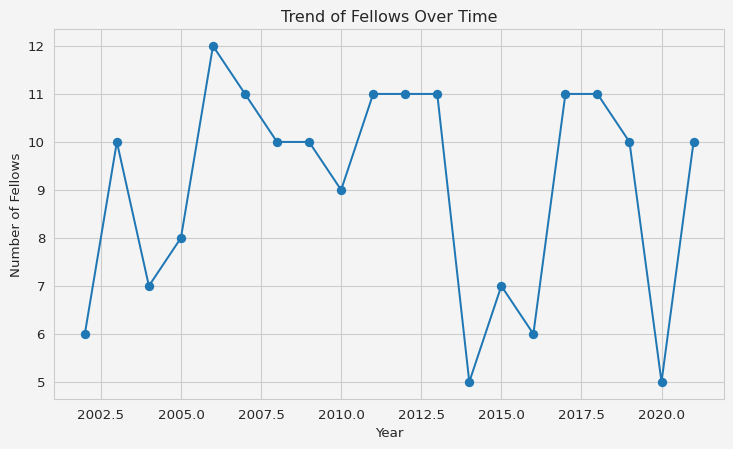

In [25]:
plt.figure(figsize=(9,5))
data['Year'] = data['Year'].astype(int)  
yearly_trend = data.groupby('Year').size()
yearly_trend.plot(kind='line', marker='o')
plt.gca().set_facecolor('#f4f4f4') 
plt.gcf().patch.set_facecolor('#f4f4f4')
plt.title('Trend of Fellows Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fellows')
plt.show()

This is just a simple example of collecting data through webscraping.
This `BeautifulSoup` has endless potentials to use in many projects to
collect the data that are not publicly available in cleaned or organized
form. Thank you for reading.

## References

-   <a href="https://doi.org/10.24432/C56C76." target="_blank">Fisher,R. A..
    (1988). Iris. UCI Machine Learning Repository.</a>

**Share on**

<a href="https://www.facebook.com/sharer.php?u=https://mrislambd.github.io/dsandml/posts/datacollection/" target="_blank" style="color:#1877F2; text-decoration: none;">

</a>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https://mrislambd.github.io/dsandml/posts/datacollection/" target="_blank" style="color:#0077B5; text-decoration: none;">

</a>

<a href="https://www.twitter.com/intent/tweet?url=https://mrislambd.github.io/dsandml/posts/datacollection/" target="_blank" style="color:#1DA1F2; text-decoration: none;">

</a>

**You may also like**